In [6]:
from typing import List, Tuple

def convert_to_cnf(cfg: List[Tuple[str, List[str]]]) -> List[Tuple[str, List[str]]]:
    """
    Convert CFG to CNF
    """
    # Step 1: Eliminate start symbol from RHS
    start_symbol = cfg[0][0]
    new_start_symbol = start_symbol + "'"
    for i in range(len(cfg)):
        if start_symbol in cfg[i][1]:
            cfg[i] = (cfg[i][0], cfg[i][1].replace(start_symbol, new_start_symbol))
    cfg.insert(0, (new_start_symbol, [start_symbol]))

    # Step 2: Remove null productions
    null_productions = set()
    for i in range(len(cfg)):
        if "" in cfg[i][1]:
            null_productions.add(cfg[i][0])
            cfg[i] = (cfg[i][0], [x for x in cfg[i][1] if x != ""])
    while True:
        updated = False
        for i in range(len(cfg)):
            if len(set(cfg[i][1]) - null_productions) == 0 and cfg[i][0] not in null_productions:
                null_productions.add(cfg[i][0])
                updated = True
        if not updated:
            break
    cfg = [(x[0], [y for y in x[1] if y not in null_productions]) for x in cfg if x[0] not in null_productions]

    # Step 3: Remove unit productions
    unit_productions = {}
    for i in range(len(cfg)):
        if len(cfg[i][1]) == 1 and cfg[i][1][0].isupper():
            unit_productions[cfg[i][0]] = cfg[i][1][0]
            cfg.pop(i)
            break
    while True:
        updated = False
        for i in range(len(cfg)):
            if len(cfg[i][1]) == 1 and cfg[i][1][0] in unit_productions:
                unit_productions[cfg[i][0]] = unit_productions[cfg[i][1][0]]
                updated = True
                cfg.pop(i)
                break
        if not updated:
            break
    cfg = [(x[0], [unit_productions[y] if y in unit_productions else y for y in x[1]]) for x in cfg]

    # Step 4: Convert productions to CNF
    cnf_cfg = []
    non_terminals = set([x[0] for x in cfg])
    terminal_symbols = set([y for x in cfg for y in x[1] if not y.isupper()])
    symbol_map = {}
    count = 65
    for s in non_terminals:
        symbol_map[s] = chr(count)
        count += 1
    for s in terminal_symbols:
        symbol_map[s] = chr(count)
        count += 1

    def split_production(production):
        if len(production) <= 2:
            return production
        new_production = production[:2]
        new_non_terminal = symbol_map[production[:2]]
        cnf_cfg.append((new_non_terminal, production[:2]))
        return new_non_terminal + split_production(production[2:])

    cnf_cfg += [(symbol_map[x[0]], split_production(x[1])) for x in cfg]
    
    return cnf_cfg

# Example usage:
cfg = [("S", ["aSb"]), ("A", ["aAS", "a", ""]), ("B", ['SbS', 'A', 'bb'])]

cnf_cfg = convert_to_cnf(cfg)
print(cnf_cfg)

[('B', ['aSb']), ('A', ['SbS', 'bb'])]


In [2]:
# now for testing
# S → ASB
# A → aAS|a|ε 
# B → SbS|A|bb


cfg = {
    'S': ['ASB'], 'A': ['aAS', 'a', 'ε'], 'B': ['SbS', 'A', 'bb']
}

print(cfg_to_cnf(cfg))

{'S': ['AS', 'SB', 'SS'], 'A': ['aA', 'AS', 'AA', 'a', 'ε'], 'B': ['Sb', 'BS', 'BB', 'A', 'bb', 'aA', 'BS', 'BB', 'a', 'ε']}


In [8]:
from typing import List, Tuple

def convert_to_cnf(cfg: List[Tuple[str, List[str]]]) -> List[Tuple[str, List[str]]]:
    """
    Convert CFG to CNF
    """
    # Step 1: Eliminate start symbol from RHS
    start_symbol = cfg[0][0]
    new_start_symbol = start_symbol + "'"
    for i in range(len(cfg)):
        if start_symbol in cfg[i][1]:
            cfg[i] = (cfg[i][0], [new_start_symbol if x == start_symbol else x for x in cfg[i][1]])
    cfg.insert(0, (new_start_symbol, [start_symbol]))

    # Step 2: Remove null productions
    null_productions = set()
    for i in range(len(cfg)):
        if "" in cfg[i][1]:
            null_productions.add(cfg[i][0])
            cfg[i] = (cfg[i][0], [x for x in cfg[i][1] if x != ""])
    while True:
        updated = False
        for i in range(len(cfg)):
            if len(set(cfg[i][1]) - null_productions) == 0 and cfg[i][0] not in null_productions:
                null_productions.add(cfg[i][0])
                updated = True
        if not updated:
            break
    cfg = [(x[0], [y for y in x[1] if y not in null_productions]) for x in cfg if x[0] not in null_productions]

    # Step 3: Remove unit productions
    unit_productions = {}
    for i in range(len(cfg)):
        if len(cfg[i][1]) == 1 and cfg[i][1][0].isupper():
            unit_productions[cfg[i][0]] = cfg[i][1][0]
            cfg.pop(i)
            break
    while True:
        updated = False
        for i in range(len(cfg)):
            if len(cfg[i][1]) == 1 and cfg[i][1][0] in unit_productions:
                unit_productions[cfg[i][0]] = unit_productions[cfg[i][1][0]]
                updated = True
                cfg.pop(i)
                break
        if not updated:
            break
    cfg = [(x[0], [unit_productions[y] if y in unit_productions else y for y in x[1]]) for x in cfg]

    # Step 4: Convert productions to CNF
    cnf_cfg = []
    non_terminals = set([x[0] for x in cfg])
    terminal_symbols = set([y for x in cfg for y in x[1] if not y.isupper()])
    symbol_map = {}
    count = 65
    for s in non_terminals:
        symbol_map[s] = chr(count)
        count += 1
    for s in terminal_symbols:
        symbol_map[s] = chr(count)
        count += 1

    def split_production(production):
        if len(production) <= 2:
            return production
        new_production = production[:2]
        new_non_terminal = symbol_map[production[:2]]
        cnf_cfg.append((new_non_terminal, production[:2]))
        return new_non_terminal + split_production(production[2:])

    cnf_cfg += [(symbol_map[x[0]], split_production(x[1])) for x in cfg]
    
    return cnf_cfg

# Example usage:
cfg = [("S", ["aSb"]), ("A", ["aAS", "a", ""]), ("B", ['SbS', 'A', 'bb'])]

cnf_cfg = convert_to_cnf(cfg)
print(cnf_cfg)

[('B', ['aSb']), ('A', ['SbS', 'bb'])]


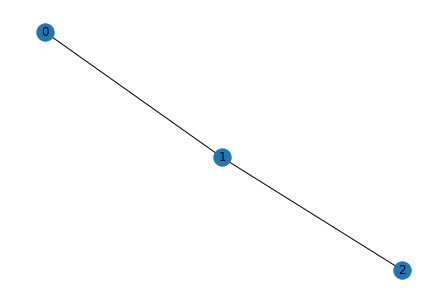

TypeError: dict.__getitem__() takes exactly one argument (2 given)

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def hopcroft_minimize(dfa):
    # Extract DFA components
    Q, Sigma, delta, q0, F = dfa
    
    # Initialize P and W
    P = [F, Q - F]
    W = [F]
    
    # Plot initial partition
    plot_partition(P)
    
    while len(W) > 0:
        A = W.pop()
        for c in Sigma:
            X = set()
            for q in Q:
                if delta(q, c) in A:
                    X.add(q)
            for Y in P:
                if len(X & Y) > 0 and len(Y - X) > 0:
                    P.remove(Y)
                    P.append(X & Y)
                    P.append(Y - X)
                    if Y in W:
                        W.remove(Y)
                        W.append(X & Y)
                        W.append(Y - X)
                    else:
                        if len(X & Y) <= len(Y - X):
                            W.append(X & Y)
                        else:
                            W.append(Y - X)
            # Plot intermediate partition
            plot_partition(P)
    
    # Construct minimized DFA
    Q_min = set()
    delta_min = dict()
    q0_min = None
    F_min = set()
    
    for p in P:
        Q_min.add(frozenset(p))
        if q0 in p:
            q0_min = frozenset(p)
        if any(q in F for q in p):
            F_min.add(frozenset(p))
    
    for p in P:
        for c in Sigma:
            delta_min[(frozenset(p), c)] = frozenset(next(iter(delta(next(iter(p)), c))))
    
    return (Q_min, Sigma, delta_min.__getitem__, q0_min, F_min)

def plot_partition(P):
    G = nx.Graph()
    for i, p in enumerate(P):
        G.add_node(i)
        for q in p:
            G.add_edge(i, q)
    nx.draw(G, with_labels=True)
    plt.show()

# Example DFA
Q = {0, 1, 2}
Sigma = {'a', 'b'}
delta = {(0, 'a'): 1,
         (0, 'b'): 2,
         (1, 'a'): 1,
         (1, 'b'): 2,
         (2, 'a'): 2,
         (2, 'b'): 2}
q0 = 0
F = {1}

dfa = (Q, Sigma, delta.__getitem__, q0, F)

# Minimize DFA
min_dfa = hopcroft_minimize(dfa)

# Print minimized DFA
print(min_dfa)

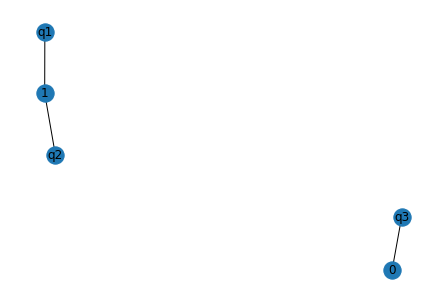

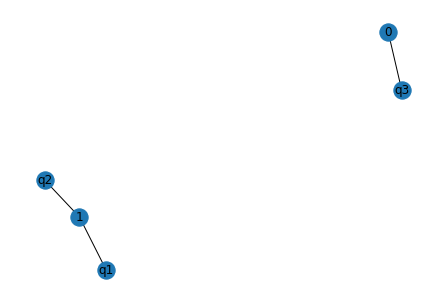

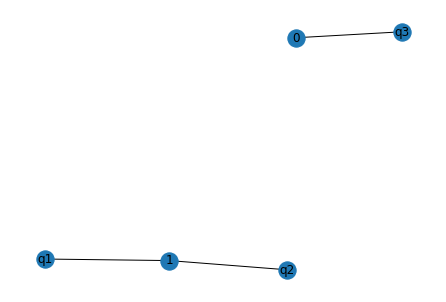

({frozenset({'q1', 'q2'}), frozenset({'q3'})}, {'b', 'a'}, <built-in method __getitem__ of dict object at 0x0000025493B8CD00>, frozenset({'q1', 'q2'}), {frozenset({'q3'})})


In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def hopcroft_minimize(dfa_table, q0, F):
    # Extract DFA components from table
    Sigma = set(dfa_table[0][1:])
    Q = set()
    delta = dict()
    for row in dfa_table[1:]:
        q = row[0]
        Q.add(q)
        for c, q_next in zip(Sigma, row[1:]):
            delta[(q, c)] = q_next
    
    # Initialize P and W
    P = [F, Q - F]
    W = [F]
    
    # Plot initial partition
    plot_partition(P)
    
    while len(W) > 0:
        A = W.pop()
        for c in Sigma:
            X = set()
            for q in Q:
                if delta[(q, c)] in A:
                    X.add(q)
            for Y in P:
                if len(X & Y) > 0 and len(Y - X) > 0:
                    P.remove(Y)
                    P.append(X & Y)
                    P.append(Y - X)
                    if Y in W:
                        W.remove(Y)
                        W.append(X & Y)
                        W.append(Y - X)
                    else:
                        if len(X & Y) <= len(Y - X):
                            W.append(X & Y)
                        else:
                            W.append(Y - X)
            # Plot intermediate partition
            plot_partition(P)
    
    # Construct minimized DFA
    Q_min = set()
    delta_min = dict()
    q0_min = None
    F_min = set()
    
    for p in P:
        Q_min.add(frozenset(p))
        if q0 in p:
            q0_min = frozenset(p)
        if any(q in F for q in p):
            F_min.add(frozenset(p))
    
    for p in P:
        for c in Sigma:
            delta_min[(frozenset(p), c)] = frozenset([delta[(next(iter(p)), c)]])
    
    return (Q_min, Sigma, delta_min.__getitem__, q0_min, F_min)

def plot_partition(P):
    G = nx.Graph()
    for i, p in enumerate(P):
        G.add_node(i)
        for q in p:
            G.add_edge(i, q)
    nx.draw(G, with_labels=True)
    plt.show()

# Example DFA table
dfa_table = [
    ['', 'a', 'b'],
    ['q1', 'q2', 'q3'],
    ['q2', 'q2', 'q3'],
    ['q3', 'q3', 'q3']
]

# Define initial and final states
q0 = 'q1'
F = {'q3'}

# Minimize DFA
min_dfa = hopcroft_minimize(dfa_table, q0, F)

# Print minimized DFA
print(min_dfa)

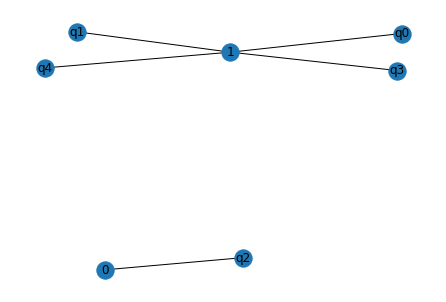

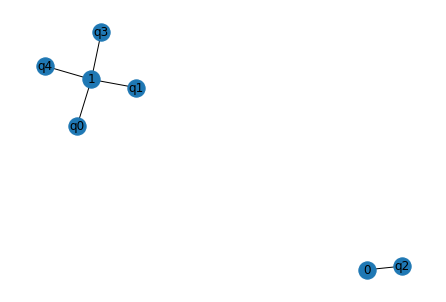

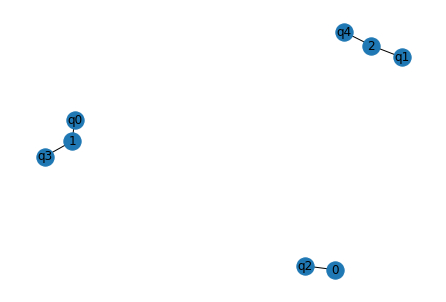

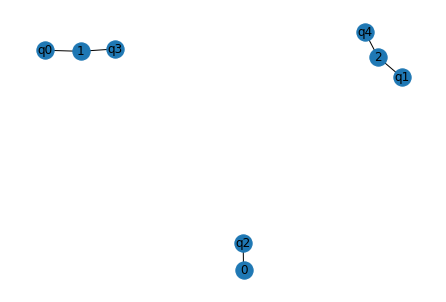

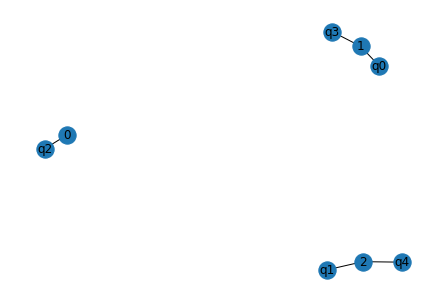

({frozenset({'q2'}), frozenset({'q4', 'q1'}), frozenset({'q0', 'q3'})}, {'b', 'a'}, <built-in method __getitem__ of dict object at 0x0000025493BFEB80>, frozenset({'q0', 'q3'}), {frozenset({'q2'})})


In [17]:
# Example DFA table
dfa_table = [
    ['', 'a', 'b'],
    ['q0', 'q1', 'q2'],
    ['q1', 'q1', 'q3'],
    ['q2', 'q4', 'q2'],
    ['q3', 'q1', 'q2'],
    ['q4', 'q4', 'q0']
]

# Define initial and final states
q0 = 'q0'
F = {'q2'}

# Minimize DFA
min_dfa = hopcroft_minimize(dfa_table, q0, F)

# Print minimized DFA
print(min_dfa)